<a href="https://colab.research.google.com/github/Ansubasnet-creator/2510322_ansu/blob/main/2510322_AnsuBasnet_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Regressiondataset/hour.csv')
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
df.isnull().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
# Drop non-useful columns
df.drop(columns=['instant', 'dteday'], inplace=True)


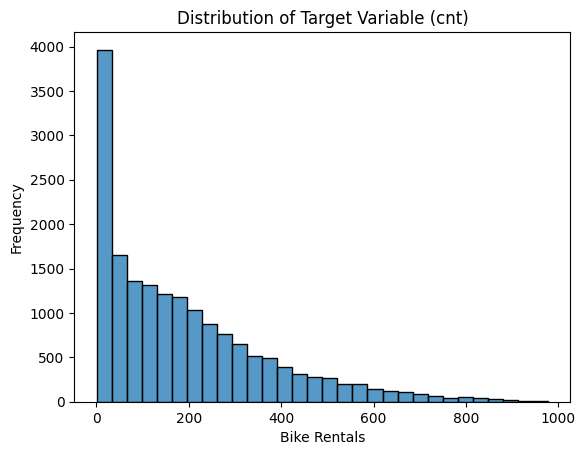

In [ ]:
plt.figure()
sns.histplot(df['cnt'], bins=30)
plt.title("Distribution of Target Variable (cnt)")
plt.xlabel("Bike Rentals")
plt.ylabel("Frequency")
plt.show()


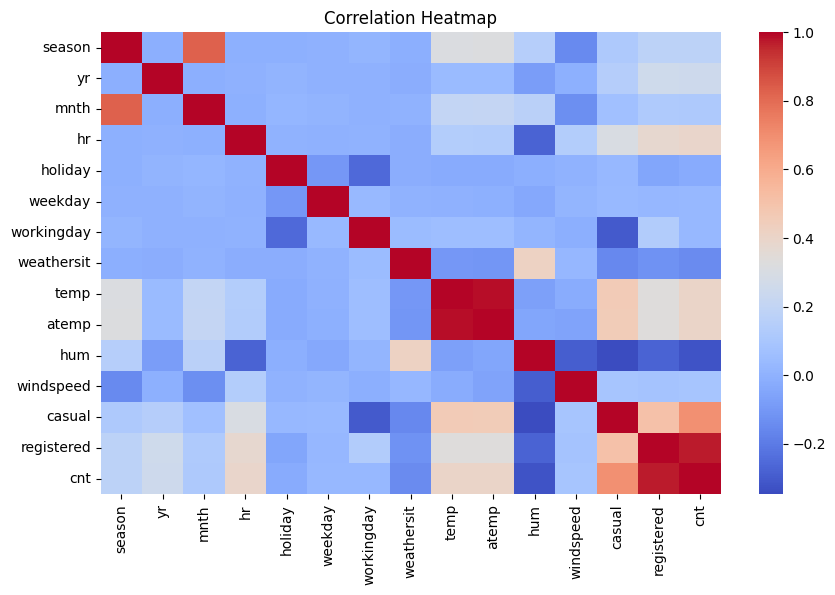

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
X = df.drop('cnt', axis=1)
y = df['cnt']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
nn_reg = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

nn_reg.fit(X_train_scaled, y_train)

y_pred_nn = nn_reg.predict(X_test_scaled)

print("Neural Network Results")
print("MAE:", mean_absolute_error(y_test, y_pred_nn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("R2:", r2_score(y_test, y_pred_nn))


Neural Network Results
MAE: 0.2774332826677436
RMSE: 0.3521684697373354
R2: 0.9999960833405965


In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [ ]:
def evaluate_regression(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

print("Linear Regression:", evaluate_regression(y_test, y_pred_lr))
print("Random Forest:", evaluate_regression(y_test, y_pred_rf))


Linear Regression: {'MAE': 2.1449968767045557e-13, 'RMSE': np.float64(2.6882396778428237e-13), 'R2': 1.0}
Random Forest: {'MAE': 0.9474568469505181, 'RMSE': np.float64(2.7229156363566913), 'R2': 0.9997658558897613}


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='r2'
)

grid_rf.fit(X_train, y_train)

print("Best RF Parameters:", grid_rf.best_params_)
print("Best RF CV Score:", grid_rf.best_score_)


Best RF Parameters: {'max_depth': 20, 'n_estimators': 200}
Best RF CV Score: 0.9997452619734982


In [ ]:
rfe = RFE(
    estimator=LinearRegression(),
    n_features_to_select=6
)

rfe.fit(X_train_scaled, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['yr', 'temp', 'atemp', 'windspeed', 'casual', 'registered'], dtype='object')


In [ ]:
X_train_sel = X_train_scaled[:, rfe.support_]
X_test_sel = X_test_scaled[:, rfe.support_]

final_lr = LinearRegression()
final_lr.fit(X_train_sel, y_train)

final_pred = final_lr.predict(X_test_sel)

print("Final Model Performance")
print(evaluate_regression(y_test, final_pred))


Final Model Performance
{'MAE': 5.651635661189658e-14, 'RMSE': np.float64(7.369843235593986e-14), 'R2': 1.0}


In [ ]:
final_results = pd.DataFrame([
    {
        "Model": "Linear Regression",
        "Features Used": len(selected_features),
        **evaluate_regression(y_test, final_pred)
    },
    {
        "Model": "Random Forest",
        "Features Used": X.shape[1],
        **evaluate_regression(y_test, y_pred_rf)
    }
])

final_results


,Model,Features Used,MAE,RMSE,R2
0,Linear Regression,6,5.651636e-14,7.369843e-14,1.000000
1,Random Forest,14,9.474568e-01,2.722916e+00,0.999766
